# Credit Card Data Insights and Customer Segmentation

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [218]:
import pandas as pd

# Data
df_customer = pd.read_csv("C:/Users/DELL'/Music/credit card/customer.csv")
df_card = pd.read_csv("C:/Users/DELL'/Music/credit card/credit_card.csv")


print(df_customer.head())
print(df_card.head())


   Client_Num  Customer_Age Gender  Dependent_Count Education_Level  \
0   708082083            24      F                1      Uneducated   
1   708083283            62      F                0         Unknown   
2   708084558            32      F                1         Unknown   
3   708085458            38      M                2      Uneducated   
4   708086958            48      M                4        Graduate   

  Marital_Status state_cd  Zipcode Car_Owner House_Owner Personal_loan  \
0         Single       FL    91750        no         yes            no   
1        Married       NJ    91750        no          no            no   
2        Married       NJ    91750       yes          no            no   
3         Single       NY    91750        no          no            no   
4         Single       TX    91750       yes         yes            no   

    contact   Customer_Job  Income  Cust_Satisfaction_Score  
0   unknown    Businessman  202326                        3  
1  c

In [219]:
df_customer.columns = df_customer.columns.str.lower()
df_card.columns = df_card.columns.str.lower()



In [220]:
print("Customer Table Columns:")
print(df_customer.columns.tolist())

print("\nCredit Card Table Columns:")
print(df_card.columns.tolist())


Customer Table Columns:
['client_num', 'customer_age', 'gender', 'dependent_count', 'education_level', 'marital_status', 'state_cd', 'zipcode', 'car_owner', 'house_owner', 'personal_loan', 'contact', 'customer_job', 'income', 'cust_satisfaction_score']

Credit Card Table Columns:
['client_num', 'card_category', 'annual_fees', 'activation_30_days', 'customer_acq_cost', 'week_start_date', 'week_num', 'qtr', 'current_year', 'credit_limit', 'total_revolving_bal', 'total_trans_amt', 'total_trans_vol', 'avg_utilization_ratio', 'use chip', 'exp type', 'interest_earned', 'delinquent_acc']


# KPI Calculation

#### Total Revenue

In [221]:

total_revenue = (df_card['annual_fees'] +
                 df_card['total_trans_amt'] +
                 df_card['interest_earned']).sum()

print(f"Total Revenue: {total_revenue:,.2f}")


Total Revenue: 55,315,410.23


#### Total Interest Earned

In [222]:
total_interest = df_card['interest_earned'].sum()
print(f"Total Interest Earned: {total_interest:,.2f}")


Total Interest Earned: 7,843,382.23


####  Total Transaction Amount

In [223]:
total_transaction_amt = df_card['total_trans_amt'].sum()
print(f"Total Transaction Amount: {total_transaction_amt:,.2f}")


Total Transaction Amount: 44,522,013.00


#### Total Transaction Count

In [224]:
total_transaction_count = df_card['total_trans_vol'].sum()
print(f"Total Transaction Count: {total_transaction_count:,}")


Total Transaction Count: 655,651


#### Avg. Customer Satisfaction Score (CSS)

In [225]:
avg_satisfaction_score = round(df_customer['cust_satisfaction_score'].mean(), 2)
print(f"Average Customer Satisfaction Score: {avg_satisfaction_score}")


Average Customer Satisfaction Score: 3.19


#### Revenue by Gender

In [226]:

merged_df = pd.merge(df_card, df_customer, on='client_num')


merged_df['revenue'] = (merged_df['annual_fees'] +
                        merged_df['total_trans_amt'] +
                        merged_df['interest_earned'])

revenue_by_gender = merged_df.groupby('gender')['revenue'].sum().round(2)

print("Revenue by Gender:")
print(revenue_by_gender)


Revenue by Gender:
gender
F    25093773.19
M    30221637.04
Name: revenue, dtype: float64


#### Group Revenue by Card Category

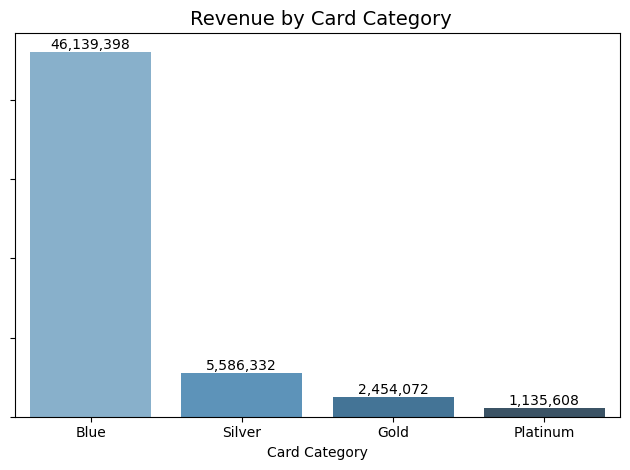

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_card['revenue'] = df_card['annual_fees'] + df_card['total_trans_amt'] + df_card['interest_earned']


revenue_by_card = df_card.groupby('card_category')['revenue'].sum().reset_index()
revenue_by_card['revenue'] = revenue_by_card['revenue'].round(2)


revenue_by_card = revenue_by_card.sort_values(by='revenue', ascending=False)


ax = sns.barplot(
    data=revenue_by_card,
    x='card_category',
    y='revenue',
    hue='card_category',
    palette='Blues_d',
    legend=False             
)



for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')


ax.set_yticklabels([])
plt.title(" Revenue by Card Category", fontsize=14)
plt.xlabel("Card Category")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [229]:

df_card['week_start_date'] = pd.to_datetime(df_card['week_start_date'], dayfirst=True)

# Extracting quarter number
df_card['quarter'] = df_card['week_start_date'].dt.quarter


print(df_card[['week_start_date', 'quarter']].head())


  week_start_date  quarter
0      2024-01-01        1
1      2024-01-01        1
2      2024-01-01        1
3      2024-01-01        1
4      2024-01-01        1


#### Revenue by Quarter

In [230]:

df_card['revenue'] = df_card['annual_fees'] + df_card['total_trans_amt'] + df_card['interest_earned']


revenue_by_quarter = df_card.groupby('quarter')['revenue'].sum().reset_index()
revenue_by_quarter['revenue'] = revenue_by_quarter['revenue'].round(2)
revenue_by_quarter['quarter'] = 'Q' + revenue_by_quarter['quarter'].astype(str)


total_row = pd.DataFrame([{
    'quarter': 'Total',
    'revenue': df_card['revenue'].sum().round(2)
}])


revenue_by_quarter = pd.concat([revenue_by_quarter, total_row], ignore_index=True)


print(revenue_by_quarter)


  quarter      revenue
0      Q1  13964362.77
1      Q2  13820566.72
2      Q3  14235479.69
3      Q4  13295001.05
4   Total  55315410.23


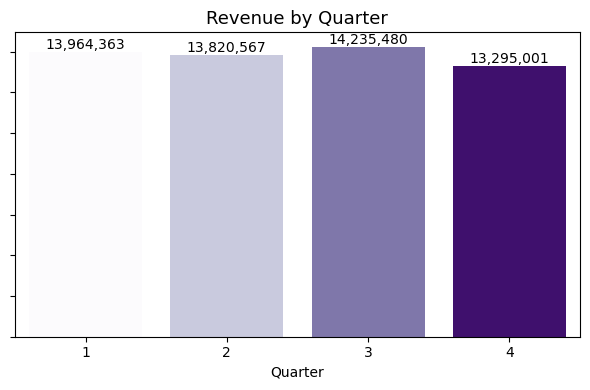

In [231]:
df_card['week_start_date'] = pd.to_datetime(df_card['week_start_date'], dayfirst=True)
df_card['revenue'] = df_card['annual_fees'] + df_card['total_trans_amt'] + df_card['interest_earned']
df_card['quarter'] = df_card['week_start_date'].dt.quarter


revenue_by_quarter = df_card.groupby('quarter')['revenue'].sum().reset_index()
revenue_by_quarter['revenue'] = revenue_by_quarter['revenue'].round(2)


plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=revenue_by_quarter,
    x='quarter',
    y='revenue',
    hue='quarter',          
    palette='Purples',
    legend=False              
)


for index, row in revenue_by_quarter.iterrows():
    ax.text(index, row['revenue'], f"{row['revenue']:,.0f}", ha='center', va='bottom')


ax.set_yticklabels([])


plt.title('Revenue by Quarter', fontsize=13)
plt.xlabel('Quarter')
plt.ylabel('')
plt.tight_layout()
plt.show()


#### Transaction Count & Revenue by Quarter

   quarter  total_trans_amt      revenue
0        1         11250588  13964362.77
1        2         11135301  13820566.72
2        3         11449700  14235479.69
3        4         10686424  13295001.05


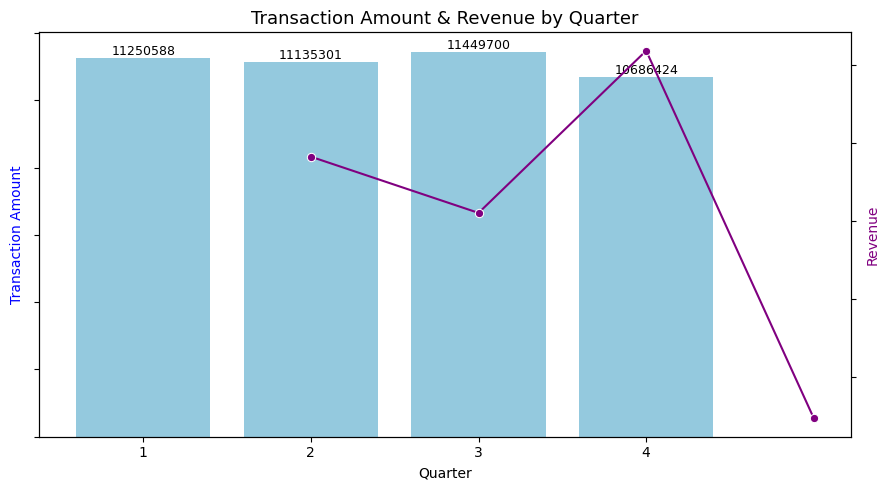

In [232]:

df_card['revenue'] = df_card['annual_fees'] + df_card['total_trans_amt'] + df_card['interest_earned']


summary = df_card.groupby('quarter')[['total_trans_amt', 'revenue']].sum().reset_index()


summary['total_trans_amt'] = summary['total_trans_amt'].round(0)
summary['revenue'] = summary['revenue'].round(2)

print(summary)


df_card['revenue'] = df_card['annual_fees'] + df_card['total_trans_amt'] + df_card['interest_earned']
df_card['week_start_date'] = pd.to_datetime(df_card['week_start_date'], dayfirst=True)
df_card['quarter'] = df_card['week_start_date'].dt.quarter


summary = df_card.groupby('quarter')[['total_trans_amt', 'revenue']].sum().reset_index()
summary['total_trans_amt'] = summary['total_trans_amt'].round(0)
summary['revenue'] = summary['revenue'].round(2)

fig, ax1 = plt.subplots(figsize=(9, 5))


sns.barplot(data=summary, x='quarter', y='total_trans_amt', ax=ax1, color='skyblue')
ax1.set_ylabel("Transaction Amount", color='blue')
ax1.set_xlabel("Quarter")
ax1.set_yticklabels([])
ax1.grid(False)


for i, row in summary.iterrows():
    ax1.text(i, row['total_trans_amt'], f"{row['total_trans_amt']:.0f}", ha='center', va='bottom', fontsize=9)


ax2 = ax1.twinx()
sns.lineplot(data=summary, x='quarter', y='revenue', ax=ax2, color='purple', marker='o')
ax2.set_ylabel("Revenue", color='purple')
ax2.set_yticklabels([])
ax2.grid(False)


plt.title("Transaction Amount & Revenue by Quarter", fontsize=13)
plt.tight_layout()
plt.show()


#### Revenue by Expenditure Type 

In [233]:

df_card['revenue'] = df_card['annual_fees'] + df_card['total_trans_amt'] + df_card['interest_earned']


revenue_by_exp = (
    df_card.groupby('exp type')['revenue']
    .sum()
    .reset_index()
    .rename(columns={'exp type': 'Expenditure Type'})
)


revenue_by_exp['Revenue (Million )'] = (revenue_by_exp['revenue'] / 1_000_000).round(2)


revenue_by_exp = revenue_by_exp.sort_values(by='Revenue (Million )', ascending=True)

print(revenue_by_exp)


  Expenditure Type      revenue  Revenue (Million )
5           Travel   5865749.73                5.87
2             Food   8250448.41                8.25
4          Grocery   8575812.24                8.58
3             Fuel   9327144.73                9.33
1    Entertainment   9521159.47                9.52
0            Bills  13775095.65               13.78


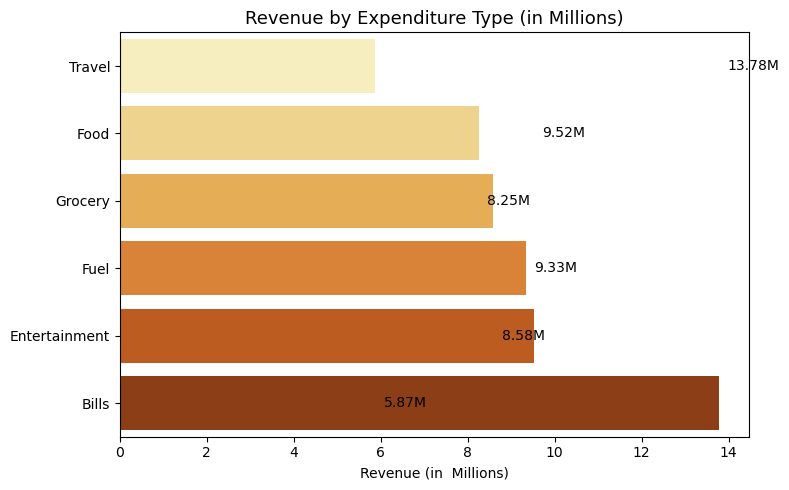

In [234]:
plt.figure(figsize=(8, 5))


ax = sns.barplot(
    data=revenue_by_exp,
    x='Revenue (Million )',
    y='Expenditure Type',
    hue='Expenditure Type',      
    palette='YlOrBr',
    legend=False
)


for index, row in revenue_by_exp.iterrows():
    ax.text(row['Revenue (Million )'] + 0.2, index, f"{row['Revenue (Million )']}M", color='black', va='center')


plt.title("Revenue by Expenditure Type (in Millions)", fontsize=13)
plt.xlabel("Revenue (in  Millions)")
plt.ylabel("")
plt.tight_layout()
plt.show()


####  Revenue by Education Level

In [236]:
df_customer.columns = df_customer.columns.str.lower().str.strip()
print(df_customer.columns)  


Index(['client_num', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'state_cd', 'zipcode', 'car_owner',
       'house_owner', 'personal_loan', 'contact', 'customer_job', 'income',
       'cust_satisfaction_score'],
      dtype='object')


In [237]:
merged_df = pd.merge(
    df_card,
    df_customer[['client_num', 'education_level']],
    on='client_num',
    how='left'
)


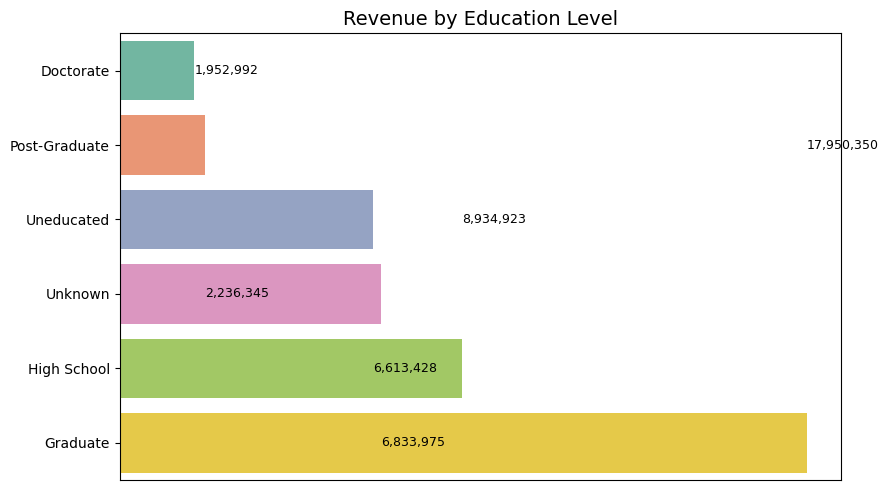

In [238]:
revenue_by_edu = revenue_by_edu.sort_values(by='revenue', ascending=True)

plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=revenue_by_edu,
    y='education_level',
    x='revenue',
    hue='education_level',
    palette='Set2',
    legend=False
)

for index, row in revenue_by_edu.iterrows():
    ax.text(row['revenue'] + 1000, index, f"{row['revenue']:,.0f}", va='center', fontsize=9)


ax.set_xticks([])              
plt.xlabel('')                
plt.ylabel('')                
ax.tick_params(axis='x', bottom=False) 


plt.title("Revenue by Education Level", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


#### Revenue by Customer Job

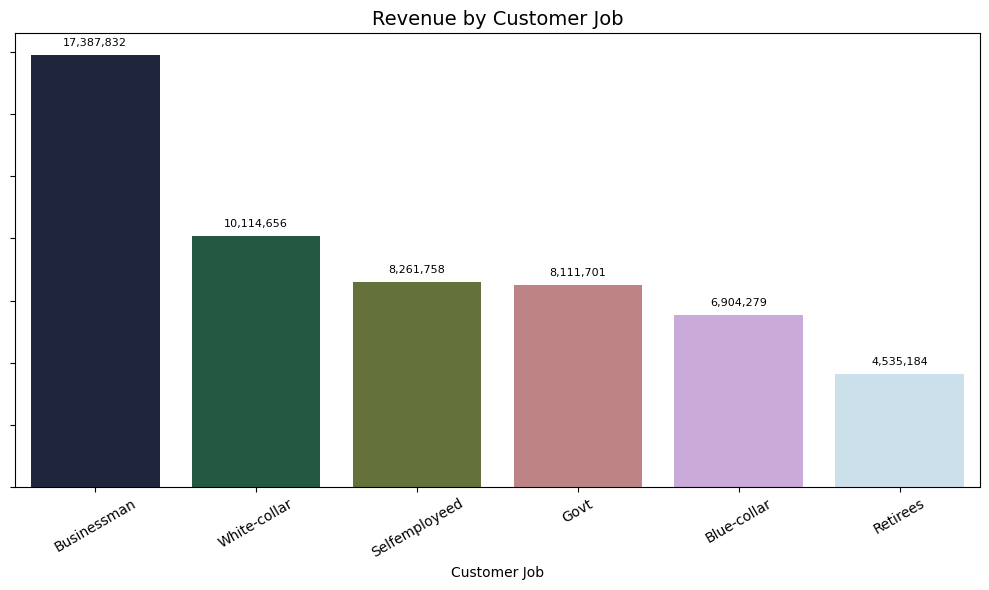

In [239]:

merged_df = pd.merge(df_card, df_customer, on='client_num', how='inner')


revenue_by_job = (
    merged_df.groupby('customer_job')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
)

revenue_by_job['revenue'] = revenue_by_job['revenue'].round(2)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=revenue_by_job,
    x='customer_job',
    y='revenue',
    hue='customer_job',
    palette='cubehelix',
    legend=False
)


for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:,.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)


ax.set_yticklabels([])
plt.title('Revenue by Customer Job', fontsize=14)
plt.xlabel('Customer Job')
plt.ylabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### 8. Revenue by Use of Chip

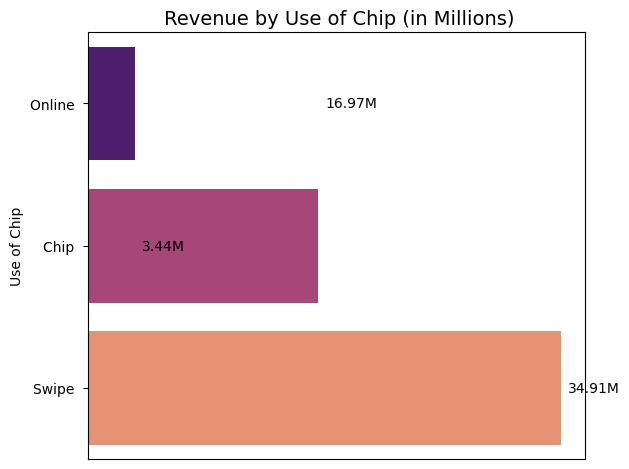

In [240]:

revenue_by_chip = (
    df_card.groupby('use chip')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=True)
)


revenue_by_chip['revenue_million'] = (revenue_by_chip['revenue'] / 1_000_000).round(2)

ax = sns.barplot(
    data=revenue_by_chip,
    y='use chip',
    x='revenue_million',
    hue='use chip',    
    palette='magma',
    legend=False
)


for index, row in revenue_by_chip.iterrows():
    value = row['revenue_million']
    label = f"{value:.2f}M"
    ax.text(value + 0.5, index, label, va='center', fontsize=10, color='black')


ax.set_xticks([])
plt.xlabel('')
plt.ylabel('Use of Chip')
plt.title(' Revenue by Use of Chip (in Millions)', fontsize=14)
plt.tight_layout()
plt.show()


####  Acquisition Cost by Card Category

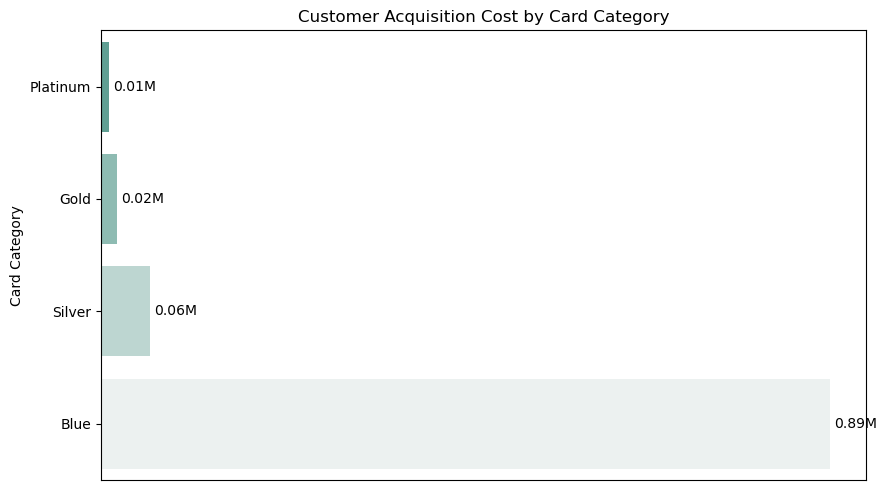

In [241]:

acq_cost_by_card = df_card.groupby('card_category')['customer_acq_cost'].sum().reset_index()


acq_cost_by_card['customer_acq_cost'] = acq_cost_by_card['customer_acq_cost'].round(2)
acq_cost_by_card['acq_cost_million'] = (acq_cost_by_card['customer_acq_cost'] / 1_000_000).round(2)
acq_cost_by_card = acq_cost_by_card.sort_values(by='customer_acq_cost', ascending=True)


plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=acq_cost_by_card,
    y='card_category',
    x='acq_cost_million',
    hue='card_category',
    palette='light:#5A9_r',
    legend=False
)


ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', bottom=False)


for container in ax.containers:
    ax.bar_label(container, fmt='{:.2f}M', fontsize=10, padding=3, color='black')

plt.title("Customer Acquisition Cost by Card Category")
plt.xlabel("")
plt.ylabel("Card Category")
plt.tight_layout()
plt.show()

#### Revenue by Income Group 

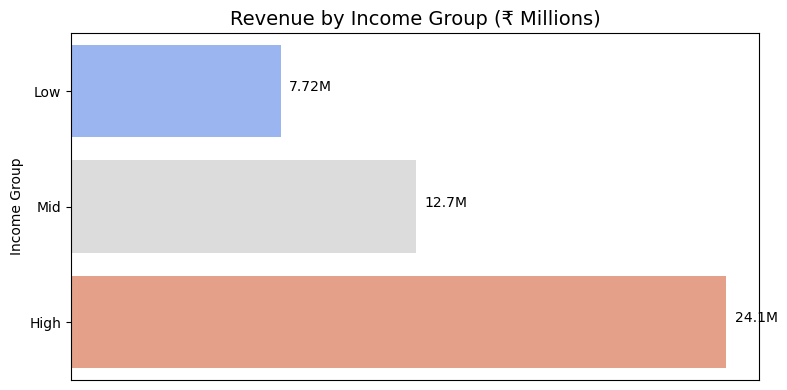

In [242]:
df_customer.columns = df_customer.columns.str.strip().str.lower()
df_card.columns = df_card.columns.str.strip().str.lower()


df_card = df_card.merge(df_customer[['client_num', 'income']], on='client_num', how='left')


df_card['income_group'] = pd.cut(
    df_card['income'],
    bins=[0, 35000, 70000, float('inf')],
    labels=['Low', 'Mid', 'High']
)


df_card['revenue'] = df_card['total_trans_amt']


revenue_by_income = (
    df_card.groupby('income_group', observed=False)['revenue']
    .sum()
    .reset_index()
)
revenue_by_income['revenue_million'] = (revenue_by_income['revenue'] / 1_000_000).round(2)


plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=revenue_by_income,
    y='income_group',
    x='revenue_million',
    hue='income_group',
    palette='coolwarm',
    legend=False
)


for i, row in revenue_by_income.iterrows():
    ax.text(row['revenue_million'] + 0.3, i, f"{row['revenue_million']}M", color='black', fontsize=10)


ax.set_xticks([])
plt.xlabel('')
plt.ylabel('Income Group')
plt.title('Revenue by Income Group (₹ Millions)', fontsize=14)
plt.tight_layout()
plt.show()


#### Revenue by Gender per Month

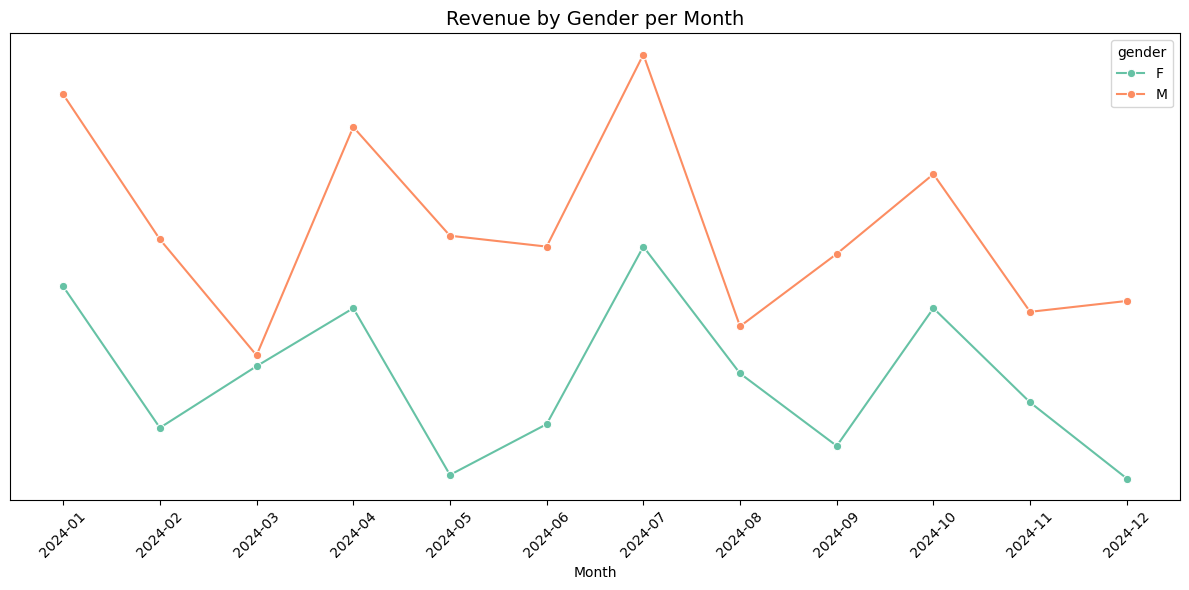

In [243]:
df_card.columns = df_card.columns.str.lower().str.strip()
df_customer.columns = df_customer.columns.str.lower().str.strip()


df_card = df_card.merge(df_customer[['client_num', 'gender']], on='client_num', how='left')


df_card['week_start_date'] = pd.to_datetime(df_card['week_start_date'], dayfirst=True)

# Extracting month in YYYY-MM format
df_card['month'] = df_card['week_start_date'].dt.to_period('M').astype(str)

df_card['revenue'] = df_card['total_trans_amt']


revenue_by_gender_month = (
    df_card.groupby(['month', 'gender'], observed=False)['revenue']
    .sum()
    .reset_index()
    .sort_values(by='month')
)


revenue_by_gender_month['revenue_million'] = (revenue_by_gender_month['revenue'] / 1_000_000).round(2)


plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=revenue_by_gender_month,
    x='month',
    y='revenue_million',
    hue='gender',
    marker='o',
    palette='Set2'
)


ax.grid(False)
ax.set_yticks([])
ax.set_yticklabels([])
ax.tick_params(axis='y', left=False)


plt.title("Revenue by Gender per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Revenue by Age Group

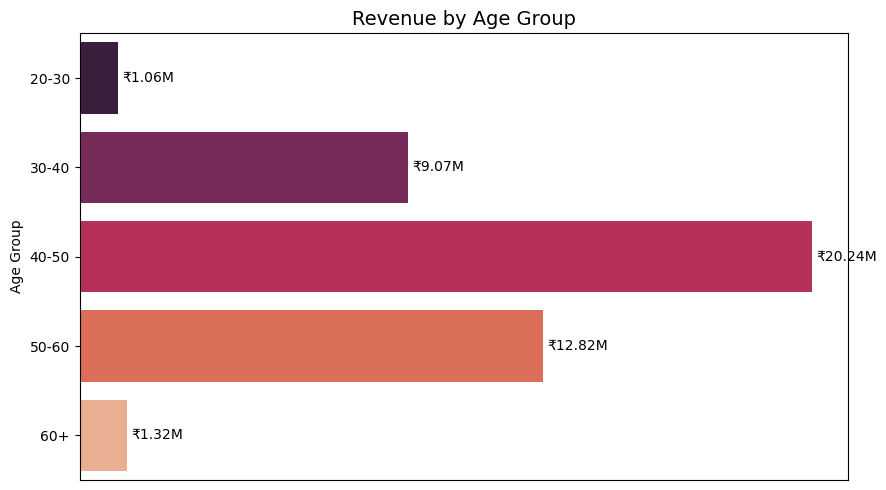

In [244]:
df_card.columns = df_card.columns.str.lower().str.strip()
df_customer.columns = df_customer.columns.str.lower().str.strip()


df_card = df_card.merge(df_customer[['client_num', 'customer_age']], on='client_num', how='left')

df_card['revenue'] = df_card['total_trans_amt']


df_card['age_group'] = pd.cut(
    df_card['customer_age'],
    bins=[19, 30, 40, 50, 60, float('inf')],
    labels=['20-30', '30-40', '40-50', '50-60', '60+']
)


revenue_by_age = (
    df_card.groupby('age_group', observed=True)['revenue']
    .sum()
    .reset_index()
)


revenue_by_age['revenue'] = revenue_by_age['revenue'].round(2)
revenue_by_age['revenue_million'] = (revenue_by_age['revenue'] / 1_000_000).round(2)


age_order = ['20-30', '30-40', '40-50', '50-60', '60+']
revenue_by_age['age_group'] = pd.Categorical(revenue_by_age['age_group'], categories=age_order, ordered=True)
revenue_by_age = revenue_by_age.sort_values('age_group')


plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=revenue_by_age,
    y='age_group',
    x='revenue_million',
    hue='age_group',
    palette='rocket',
    legend=False
)


ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', bottom=False)
ax.grid(False)


for container in ax.containers:
    ax.bar_label(container, fmt='₹{:.2f}M', fontsize=10, padding=3, color='black')


plt.title("Revenue by Age Group", fontsize=14)
plt.xlabel("")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


#### Revenue by Gender in Top 5 States 

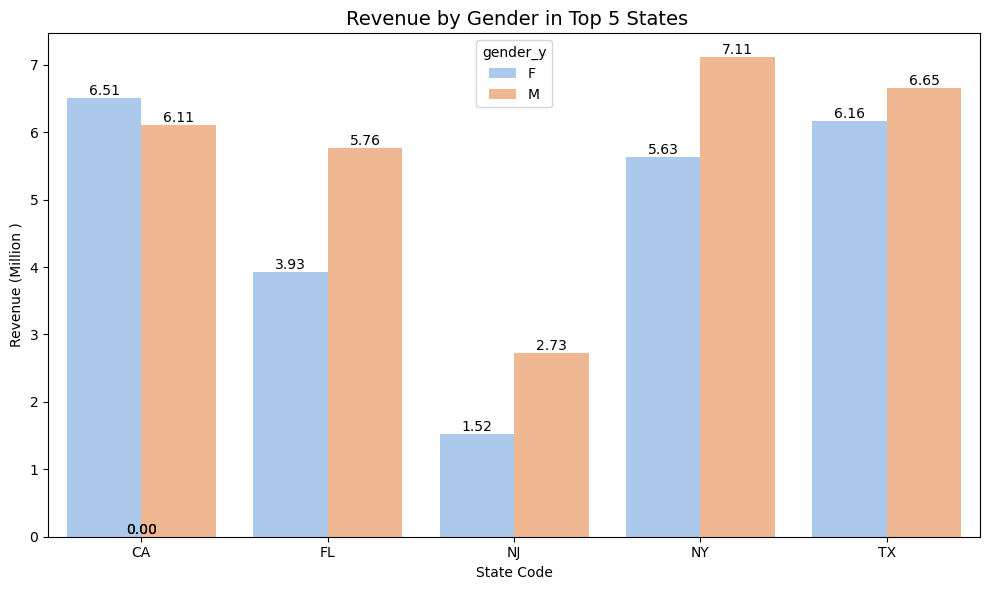

In [245]:

merged['revenue'] = merged['annual_fees'] + merged['total_trans_amt'] + merged['interest_earned']


top_states = (
    merged.groupby('state_cd')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)


filtered = merged[merged['state_cd'].isin(top_states)]


revenue_by_gender_state = (
    filtered.groupby(['state_cd', 'gender_y'])['revenue']
    .sum()
    .reset_index()
)


revenue_by_gender_state['revenue_million'] = (revenue_by_gender_state['revenue'] / 1_000_000).round(2)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=revenue_by_gender_state,
    x='state_cd',
    y='revenue_million',
    hue='gender_y',
    palette='pastel'
)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)


plt.title(" Revenue by Gender in Top 5 States", fontsize=14)
plt.xlabel("State Code")
plt.ylabel("Revenue (Million )")
plt.tight_layout()
plt.show()


<Figure size 900x500 with 0 Axes>

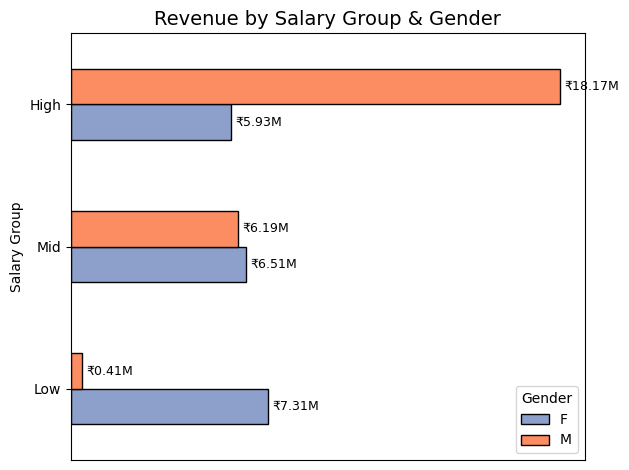

In [246]:

df_card['salary_group'] = pd.cut(
    df_card['income'],
    bins=[0, 35000, 70000, float('inf')],
    labels=['Low', 'Mid', 'High']
)


revenue_by_salary_gender = (
    df_card.groupby(['salary_group', 'gender'], observed=True)['revenue']
    .sum()
    .reset_index()
)
revenue_by_salary_gender['revenue_million'] = (revenue_by_salary_gender['revenue'] / 1_000_000).round(2)

pivoted_salary = revenue_by_salary_gender.pivot(
    index='salary_group',
    columns='gender',
    values='revenue_million'
).fillna(0)
pivoted_salary = pivoted_salary.loc[['Low', 'Mid', 'High']]  # Ensure correct order


plt.figure(figsize=(9, 5))
ax = pivoted_salary.plot(
    kind='barh',
    stacked=False,
    color=['#8da0cb', '#fc8d62'],
    edgecolor='black',
    legend=True
)


ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', bottom=False)
ax.grid(False)


for container in ax.containers:
    ax.bar_label(container, fmt='₹{:.2f}M', fontsize=9, padding=3, color='black')


plt.title("Revenue by Salary Group & Gender", fontsize=14)
plt.xlabel("")
plt.ylabel("Salary Group")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


#### Revenue by Dependent Count &Gender 

In [247]:
df_card = df_card.merge(
    df_customer[['client_num', 'dependent_count']],
    on='client_num',
    how='left'
)


<Figure size 1000x600 with 0 Axes>

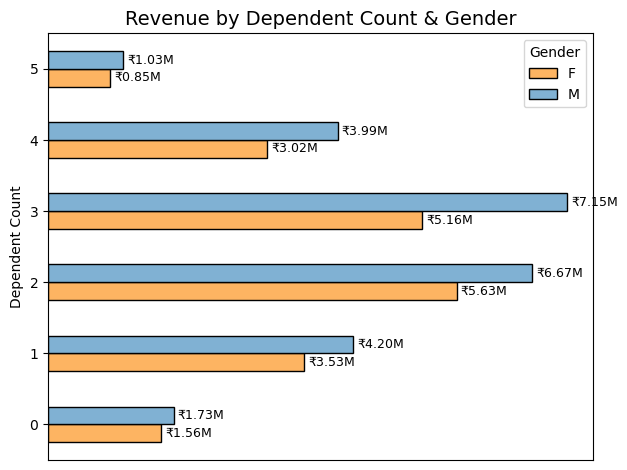

In [248]:
revenue_by_dependents = (
    df_card.groupby(['dependent_count', 'gender'], observed=True)['revenue']
    .sum()
    .reset_index()
)

revenue_by_dependents['revenue_million'] = (revenue_by_dependents['revenue'] / 1_000_000).round(2)

pivoted_dependents = revenue_by_dependents.pivot(
    index='dependent_count',
    columns='gender',
    values='revenue_million'
).fillna(0)


pivoted_dependents = pivoted_dependents.sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = pivoted_dependents.plot(
    kind='barh',
    stacked=False,
    color=['#fdb462', '#80b1d3'],
    edgecolor='black',
    legend=True
)

ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', bottom=False)
ax.grid(False)

for bars in ax.containers:
    ax.bar_label(bars, fmt='₹{:.2f}M', fontsize=9, padding=3, color='black')

plt.title("Revenue by Dependent Count & Gender", fontsize=14)
plt.xlabel("")
plt.ylabel("Dependent Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


#### Revenue by Marital Status & Gender

<Figure size 900x500 with 0 Axes>

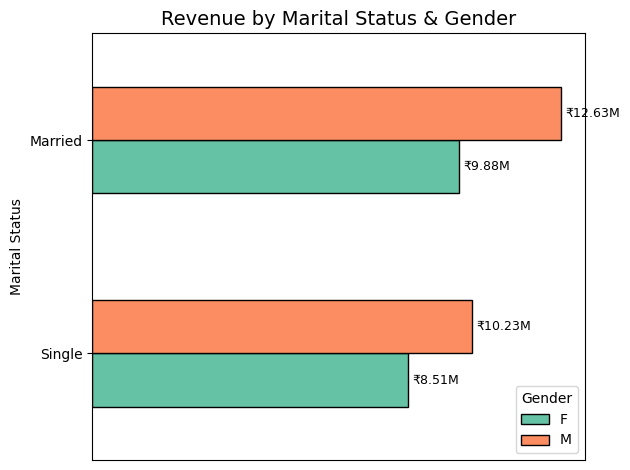

In [215]:
df_card = df_card.merge(
    df_customer[['client_num', 'marital_status']],
    on='client_num',
    how='left'
)
revenue_by_marital = (
    df_card.groupby(['marital_status', 'gender'], observed=True)['revenue']
    .sum()
    .reset_index()
)

revenue_by_marital['revenue_million'] = (revenue_by_marital['revenue'] / 1_000_000).round(2)

pivoted_marital = revenue_by_marital.pivot(
    index='marital_status',
    columns='gender',
    values='revenue_million'
).fillna(0)


pivoted_marital = pivoted_marital.reindex(['Single', 'Married'])

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
ax = pivoted_marital.plot(
    kind='barh',
    stacked=False,
    color=['#66c2a5', '#fc8d62'],
    edgecolor='black',
    legend=True
)

ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', bottom=False)
ax.grid(False)

for bars in ax.containers:
    ax.bar_label(bars, fmt='₹{:.2f}M', fontsize=9, padding=3, color='black')

plt.title("Revenue by Marital Status & Gender", fontsize=14)
plt.xlabel("")
plt.ylabel("Marital Status")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


#### Revenue by Education Level & Gender

<Figure size 1000x600 with 0 Axes>

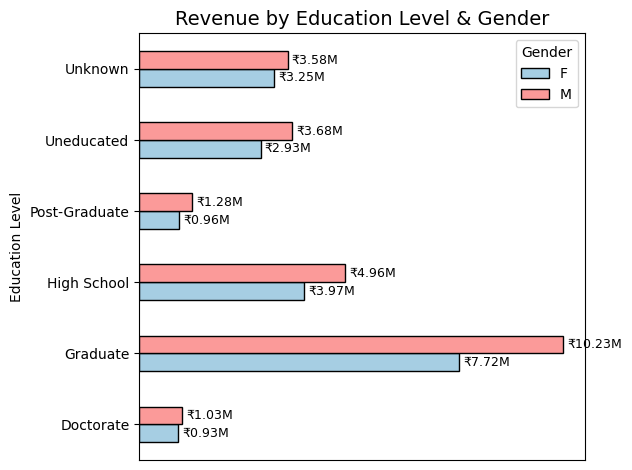

In [216]:

df_card = df_card.merge(
    df_customer[['client_num', 'education_level']],
    on='client_num',
    how='left'
)


revenue_by_edu_gender = (
    df_card.groupby(['education_level', 'gender'], observed=True)['revenue']
    .sum()
    .reset_index()
)


revenue_by_edu_gender['revenue_million'] = (revenue_by_edu_gender['revenue'] / 1_000_000).round(2)


pivoted_edu = revenue_by_edu_gender.pivot(
    index='education_level',
    columns='gender',
    values='revenue_million'
).fillna(0)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = pivoted_edu.plot(
    kind='barh',
    stacked=False,
    color=['#a6cee3', '#fb9a99'],
    edgecolor='black',
    legend=True
)


ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', bottom=False)
ax.grid(False)

for container in ax.containers:
    ax.bar_label(container, fmt='₹{:.2f}M', fontsize=9, padding=3, color='black')

plt.title("Revenue by Education Level & Gender", fontsize=14)
plt.xlabel("")
plt.ylabel("Education Level")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()
